# Polymer Electrolyte Data Mining Project: 
## Step 1: Cleaning data file in preparation for visualizations and further statistical learning methods


In [153]:
from rdkit import Chem
from mordred import Calculator, descriptors, Polarizability, HydrogenBond,RotatableBond,  VdwVolumeABC, Weight, AcidBase, AtomCount, ExtendedTopochemicalAtom, KappaShapeIndex  #GeometricalIndex,
import pandas as pd
import numpy as np

### Import data

Import the data from excel as a dataframe, then inspect first 5 rows

In [246]:
# Import data from master excel file
data = pd.read_excel(r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\Finalized_dataMining_Spreadsheet.xlsx')
data.tail()

,Polymer system Notes,Polymer family,Polymer,SMILES descriptor 1,SMILES descriptor 2,Comonomer percentage,Average functional group per monomer,Anion,Li:monomer,Li:functional group,...,Polymer Mn (kDa),Polymer Mw (kDa),chain architecture,Solvent used,drying temp,drying time (h),drying vacuum,Notes,DOI,Reference
650,6,ether,poly (ethylene oxide-co-digol methyl glycidyl ...,COC,C(COCCOCCOC)OC,71.4,NaN,CF3SO3,NaN,0.062461,...,NaN,1000.0,branched,acetonitrile,65,6,yes,vacuum >10^-3 mmHg,10.1021/ma00207a006,"D. G. H. Ballard, P. Cheshire, T. S. Mann and ..."
651,6,ether,poly (ethylene oxide-co-digol methyl glycidyl ...,COC,C(COCCOCCOC)OC,71.4,NaN,CF3SO3,NaN,0.033156,...,NaN,1000.0,branched,acetonitrile,65,6,yes,vacuum >10^-3 mmHg,10.1021/ma00207a006,"D. G. H. Ballard, P. Cheshire, T. S. Mann and ..."
652,6,ether,poly (ethylene oxide-co-digol methyl glycidyl ...,COC,C(COCCOCCOC)OC,71.4,NaN,CF3SO3,NaN,0.019904,...,NaN,1000.0,branched,acetonitrile,65,6,yes,vacuum >10^-3 mmHg,10.1021/ma00207a006,"D. G. H. Ballard, P. Cheshire, T. S. Mann and ..."
653,6,ether,poly (ethylene oxide-co-digol methyl glycidyl ...,COC,C(COCCOCCOC)OC,71.4,NaN,CF3SO3,NaN,0.014263,...,NaN,1000.0,branched,acetonitrile,65,6,yes,vacuum >10^-3 mmHg,10.1021/ma00207a006,"D. G. H. Ballard, P. Cheshire, T. S. Mann and ..."
654,6,ether,poly (ethylene oxide-co-digol methyl glycidyl ...,COC,C(COCCOCCOC)OC,71.4,NaN,CF3SO3,NaN,0.010007,...,NaN,1000.0,branched,acetonitrile,65,6,yes,vacuum >10^-3 mmHg,10.1021/ma00207a006,"D. G. H. Ballard, P. Cheshire, T. S. Mann and ..."


Look at dataframe characteristics:

In [247]:
print(f'Dataframe size: {data.shape}')
print('Unique papers: ', len(pd.unique(data['DOI'])))
print('Unique polymers: ', len(pd.unique(data['Polymer'])))

Dataframe size: (655, 75)
Unique papers:  65
Unique polymers:  78


### Preparing to calculate MORDRED descriptors for polymers

Includes drawing chemical structures for SMILES representations of molecules. Visualize results in stages so that images are large enough to analyze

In [156]:
# First, want to parse my data for each unique polymer (based on SMILES representation), so that I'm not recalculating
# the descriptors for each repeat of the same polymer...
SMILES_type1 = pd.unique(data['SMILES descriptor 1'])

# remove nan instances
SMILES_type_fix1 = SMILES_type1[~pd.isnull(SMILES_type1)]

# have to add Chem.MolFromSmiles for each string in list
SMILES_type_Chem1 = [Chem.MolFromSmiles(smile) for smile in SMILES_type_fix1]

print('Number of structures: ', len(SMILES_type_Chem1))

Number of structures:  70


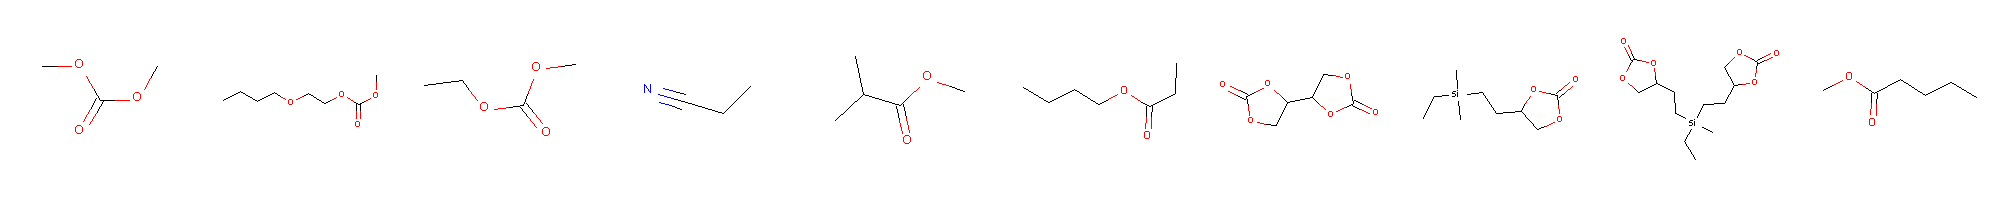

In [157]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[0:10])

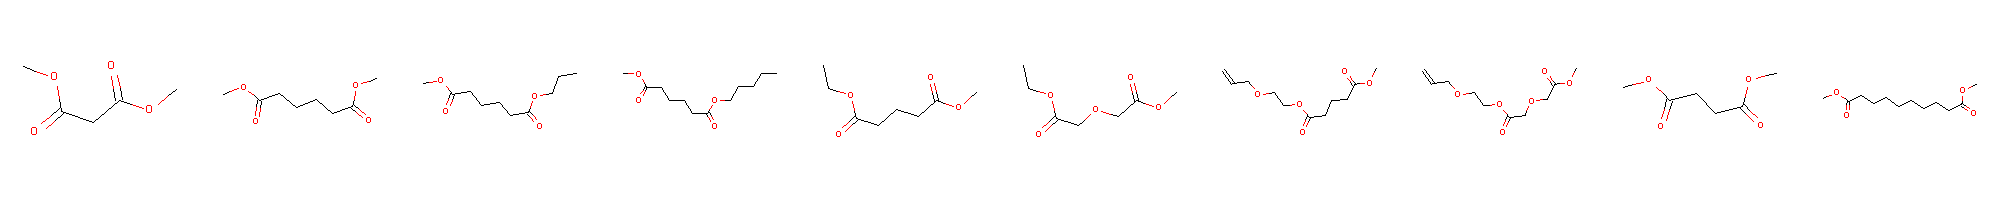

In [158]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[10:20])

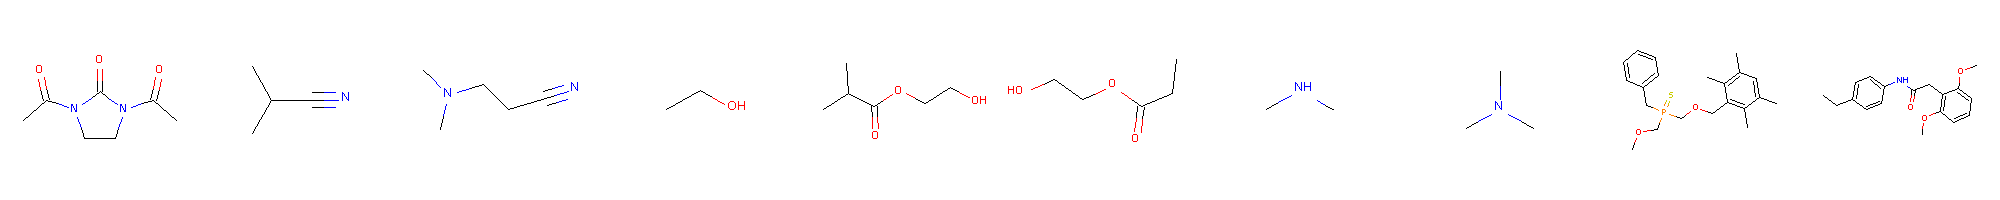

In [159]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[20:30])

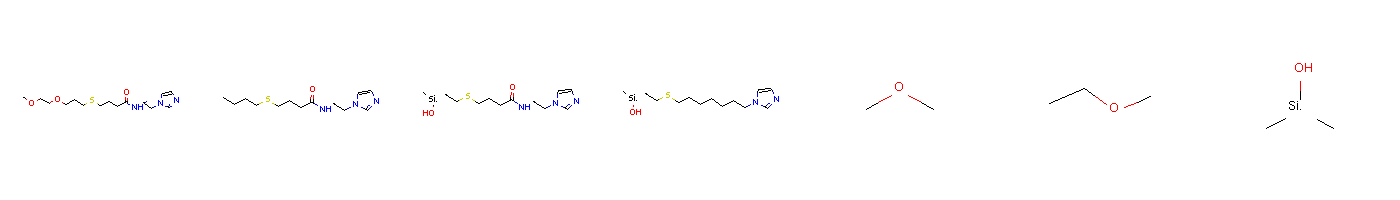

In [160]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[30:37])

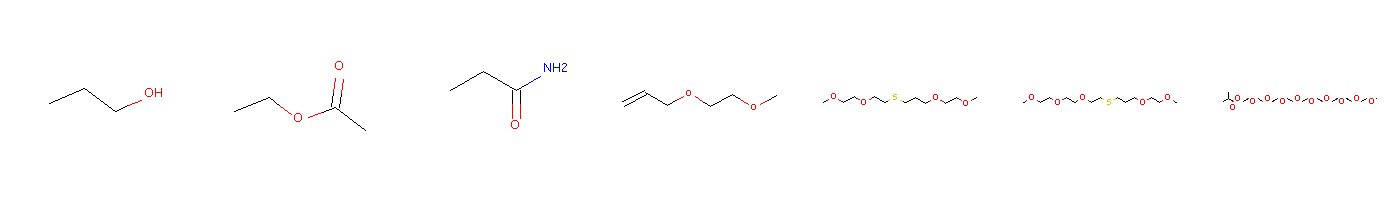

In [161]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[37:44])

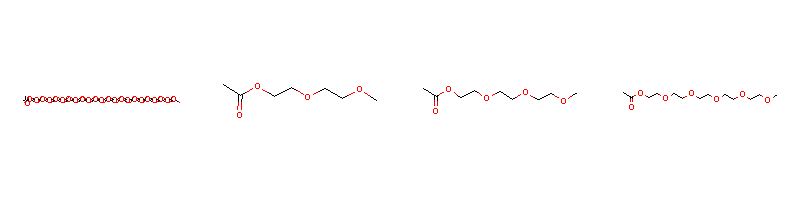

In [162]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[44:48])

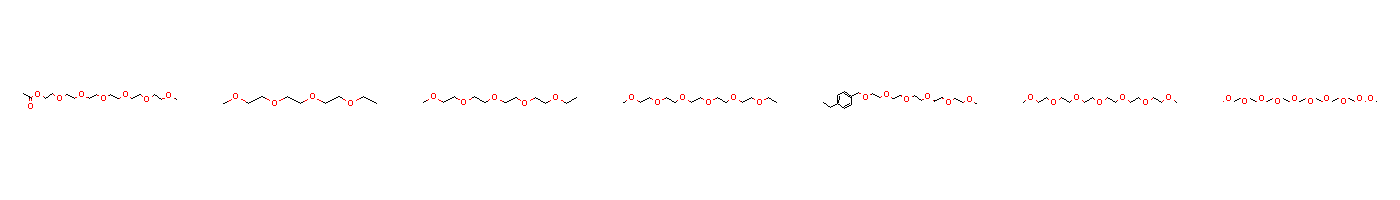

In [163]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[48:55])

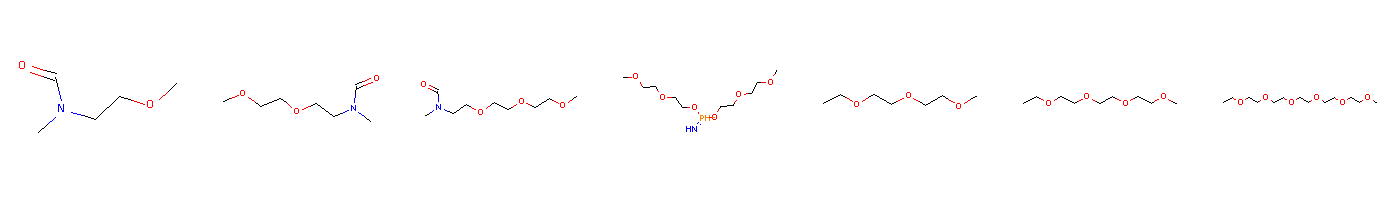

In [164]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[55:62])

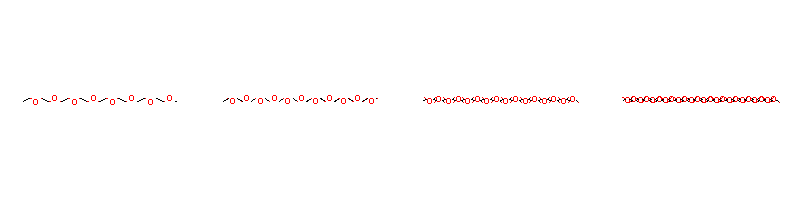

In [165]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[62:66])

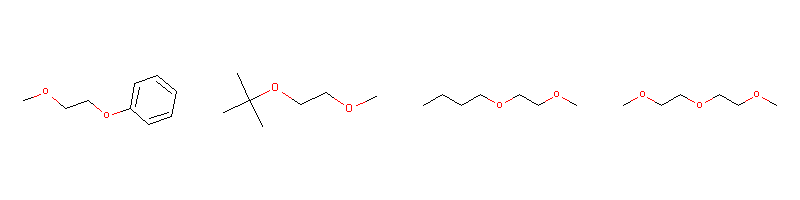

In [166]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[66:])

In [167]:
# Repeat for comonomer 2
SMILES_type2 = pd.unique(data['SMILES descriptor 2'])

# remove nan instances
SMILES_type_fix2 = SMILES_type2[~pd.isnull(SMILES_type2)]

# have to add Chem.MolFromSmiles for each string in list
SMILES_type_Chem2 = [Chem.MolFromSmiles(smile) for smile in SMILES_type_fix2]

print('Number of structures: ', len(SMILES_type_Chem2))

Number of structures:  70


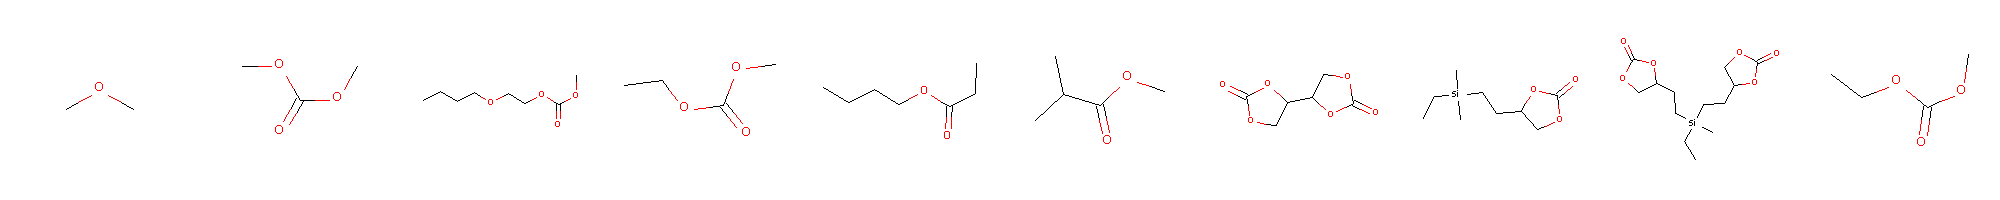

In [168]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[0:10])

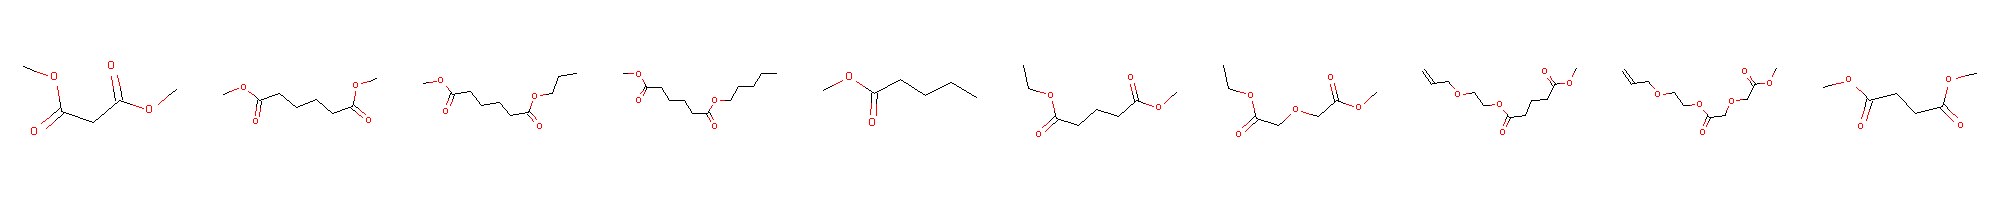

In [169]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[10:20])

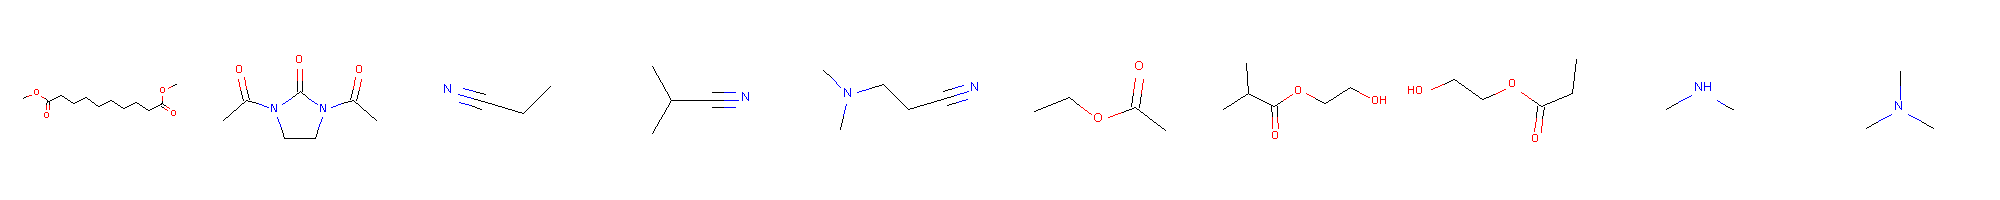

In [170]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[20:30])

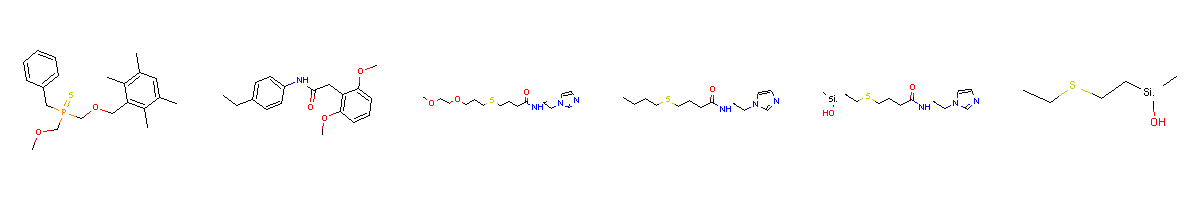

In [171]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[30:36])

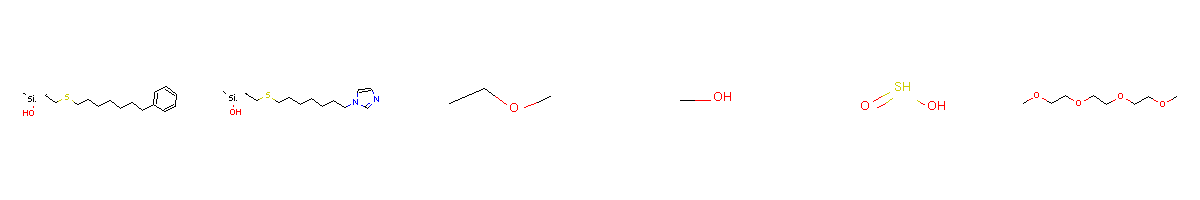

In [172]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[36:42])

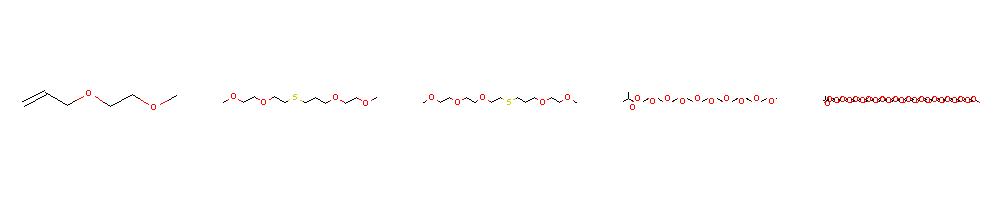

In [173]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[42:47])

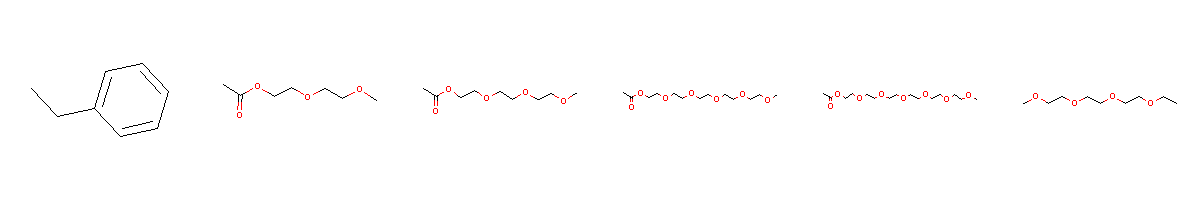

In [174]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[47:53])

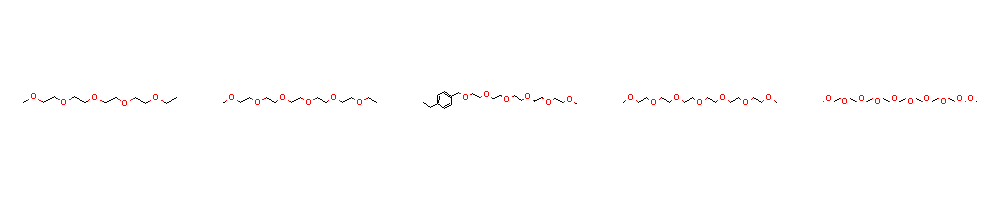

In [175]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[53:58])

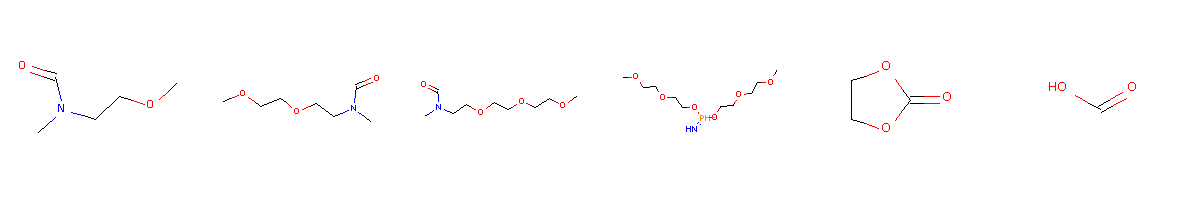

In [176]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[58:64])

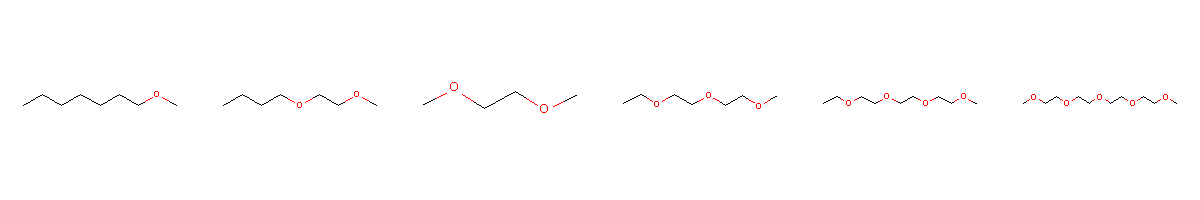

In [177]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[64:])

### Calculating MORDRED descriptors for polymers

Can either calculate all descriptors, or just calculate a subset (the ones deemed the most relevant)

Paper reference: https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0258-y
List of possible descriptors: https://mordred-descriptor.github.io/documentation/master/api/modules.html

In [178]:
# step 1: calculate MORDRED descriptors for each SMILES type
# This can be done in parallel using MOREDRED calc.pandas(list of SMILES)

# descriptors of interest:
MRD_descrip = [Polarizability, HydrogenBond,RotatableBond, VdwVolumeABC, Weight, AcidBase,AtomCount, ExtendedTopochemicalAtom, KappaShapeIndex]

# initialize MORDRED calculator
calc = Calculator(MRD_descrip)

# calculates descriptors for each SMILES type in the list SMILES_type. Stores this as a pandas dataframe
comon1 = calc.pandas(SMILES_type_Chem1)
comon2 = calc.pandas(SMILES_type_Chem2)

100%|██████████| 70/70 [00:02<00:00, 24.21it/s]


#### Ensure no missing entries, rename headers for comonomer 1 vs 2, and correct for truncated monomers

In [179]:
print('Number of null instances of smiles comonomer 1: ',pd.isnull(SMILES_type1).sum())
print('Number of null instances of smiles comonomer 2: ',pd.isnull(SMILES_type2).sum())

Number of null instances of smiles comonomer 1:  0
Number of null instances of smiles comonomer 2:  0


In [248]:
# rename headers for comonomer1 MORDRED descriptors
newcolumns = {}

for column in comon1:
    newcolumns[column] = 'Comonomer1 ' + column

comon1_correct = comon1.rename(columns = newcolumns)
comon1_correct

,Comonomer1 apol,Comonomer1 bpol,Comonomer1 nHBAcc,Comonomer1 nHBDon,Comonomer1 nRot,Comonomer1 RotRatio,Comonomer1 Vabc,Comonomer1 MW,Comonomer1 AMW,Comonomer1 nAcid,...,Comonomer1 ETA_dEpsilon_C,Comonomer1 ETA_dEpsilon_D,Comonomer1 ETA_dBeta,Comonomer1 AETA_dBeta,Comonomer1 ETA_psi_1,Comonomer1 ETA_dPsi_A,Comonomer1 ETA_dPsi_B,Comonomer1 Kier1,Comonomer1 Kier2,Comonomer1 Kier3
0,11.416758,10.359242,3,0,0,0.000000,84.178637,90.031694,7.502641,0,...,-0.271667,0.0,-2.25,-0.375000,0.384615,0.329385,0.0,6.000000,3.200000,3
1,27.236688,22.127312,4,0,6,0.545455,179.448790,176.104859,6.289459,0,...,-0.154637,0.0,-5.75,-0.479167,0.465116,0.248884,0.0,12.000000,9.090909,9
2,14.420344,12.365656,3,0,1,0.166667,101.474622,104.047344,6.936490,0,...,-0.218261,0.0,-2.75,-0.392857,0.416667,0.297333,0.0,7.000000,4.166667,3.84
3,9.443965,5.586035,1,0,0,0.000000,66.168257,55.042199,6.115800,0,...,-0.107937,0.0,1.25,0.312500,0.593750,0.120250,0.0,4.000000,3.000000,4
4,16.621930,12.636070,2,0,1,0.166667,109.980380,102.068080,6.004005,0,...,-0.133163,0.0,-2.25,-0.321429,0.492228,0.221772,0.0,7.000000,3.061224,2.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,167.757300,141.984700,24,0,70,0.972222,1067.025182,1072.660454,6.200349,0,...,-0.143018,0.0,-48.00,-0.657534,0.467626,0.246374,0.0,73.000000,72.000000,72
66,24.635516,15.510484,2,0,4,0.363636,150.634944,152.083730,6.612336,0,...,-0.071264,0.0,0.00,0.000000,0.559567,0.154433,0.0,9.090909,5.625000,3.78698
67,23.962688,19.523312,2,0,3,0.375000,147.208809,132.115030,5.284601,0,...,-0.081195,0.0,-5.00,-0.555556,0.531915,0.182085,0.0,9.000000,3.920000,8
68,23.962688,19.523312,2,0,6,0.750000,147.208809,132.115030,5.284601,0,...,-0.081195,0.0,-5.00,-0.555556,0.531915,0.182085,0.0,9.000000,8.000000,8


#### For truncated monomers, visualize results and then remove incorrect features (nHBDon)

In [181]:
comon1_correct[32:34]

,Comonomer1 apol,Comonomer1 bpol,Comonomer1 nHBAcc,Comonomer1 nHBDon,Comonomer1 nRot,Comonomer1 RotRatio,Comonomer1 Vabc,Comonomer1 MW,Comonomer1 AMW,Comonomer1 nAcid,...,Comonomer1 ETA_dEpsilon_C,Comonomer1 ETA_dEpsilon_D,Comonomer1 ETA_dBeta,Comonomer1 AETA_dBeta,Comonomer1 ETA_psi_1,Comonomer1 ETA_dPsi_A,Comonomer1 ETA_dPsi_B,Comonomer1 Kier1,Comonomer1 Kier2,Comonomer1 Kier3
32,48.043446,40.398554,5,2,10,0.526316,288.212822,300.120199,7.320005,0,...,-0.090530,0.049373,-6.75,-0.355263,0.639871,0.074129,0.0,17.052632,10.747934,9.52066
33,49.811825,41.970175,4,1,11,0.611111,288.358278,285.145686,6.631295,0,...,-0.046739,0.024220,-7.00,-0.388889,0.710110,0.003890,0.0,16.055556,10.880000,9.6


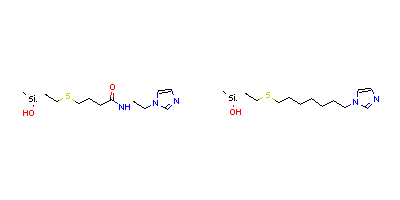

In [182]:
Chem.Draw.MolsToImage(SMILES_type_Chem1[32:34])

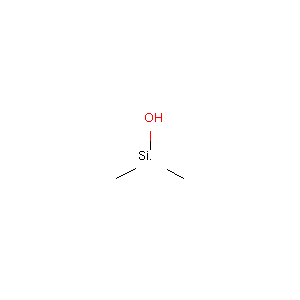

In [183]:
Chem.Draw.MolToImage(SMILES_type_Chem1[36])

In [184]:
comon1_correct[36:37]

,Comonomer1 apol,Comonomer1 bpol,Comonomer1 nHBAcc,Comonomer1 nHBDon,Comonomer1 nRot,Comonomer1 RotRatio,Comonomer1 Vabc,Comonomer1 MW,Comonomer1 AMW,Comonomer1 nAcid,...,Comonomer1 ETA_dEpsilon_C,Comonomer1 ETA_dEpsilon_D,Comonomer1 ETA_dBeta,Comonomer1 AETA_dBeta,Comonomer1 ETA_psi_1,Comonomer1 ETA_dPsi_A,Comonomer1 ETA_dPsi_B,Comonomer1 Kier1,Comonomer1 Kier2,Comonomer1 Kier3
36,14.339551,18.602449,1,1,0,0.0,86.129272,75.026616,6.820601,0,...,-0.020437,0.080833,-2.25,-0.5625,0.91716,0.0,0.20316,4.0,1.333333,float division by zero (Kier3/mordred.Chi.ChiC...


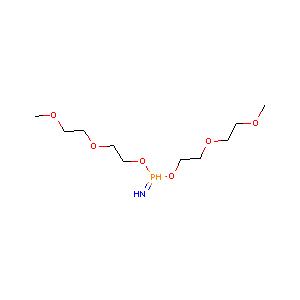

In [185]:
Chem.Draw.MolToImage(SMILES_type_Chem1[58])

In [186]:
comon1_correct[58:59]

,Comonomer1 apol,Comonomer1 bpol,Comonomer1 nHBAcc,Comonomer1 nHBDon,Comonomer1 nRot,Comonomer1 RotRatio,Comonomer1 Vabc,Comonomer1 MW,Comonomer1 AMW,Comonomer1 nAcid,...,Comonomer1 ETA_dEpsilon_C,Comonomer1 ETA_dEpsilon_D,Comonomer1 ETA_dBeta,Comonomer1 AETA_dBeta,Comonomer1 ETA_psi_1,Comonomer1 ETA_dPsi_A,Comonomer1 ETA_dPsi_B,Comonomer1 Kier1,Comonomer1 Kier2,Comonomer1 Kier3
58,42.245032,42.332968,7,1,14,0.823529,265.081687,285.134124,6.788908,0,...,-0.157143,0.066667,-10.25,-0.569444,0.482759,0.231241,0.0,18.0,15.058824,15


In [187]:
comon1_correct.loc[32, 'Comonomer1 nHBDon'] = 1
comon1_correct.loc[32, 'Comonomer1 nHBDon'] = 0
comon1_correct.loc[36, 'Comonomer1 nHBDon'] = 0
comon1_correct.loc[58, 'Comonomer1 nHBDon'] = 0

#### Repeat analysis and fixes for comonomer 2

In [188]:
# rename headers for comonomer2 MORDRED descriptors
newcolumns = {}

for column in comon2:
    newcolumns[column] = 'Comonomer2 ' + column

comon2_correct = comon2.rename(columns = newcolumns)
comon2_correct.head(10)

,Comonomer2 apol,Comonomer2 bpol,Comonomer2 nHBAcc,Comonomer2 nHBDon,Comonomer2 nRot,Comonomer2 RotRatio,Comonomer2 Vabc,Comonomer2 MW,Comonomer2 AMW,Comonomer2 nAcid,...,Comonomer2 ETA_dEpsilon_C,Comonomer2 ETA_dEpsilon_D,Comonomer2 ETA_dBeta,Comonomer2 AETA_dBeta,Comonomer2 ETA_psi_1,Comonomer2 ETA_dPsi_A,Comonomer2 ETA_dPsi_B,Comonomer2 Kier1,Comonomer2 Kier2,Comonomer2 Kier3
0,8.142758,7.755242,1,0,0,0.000000,51.938656,46.041865,5.115763,0,...,-0.109428,0.0,-1.50,-0.500000,0.465116,0.248884,0.0,3.000000,2,float division by zero (Kier3/mordred.Chi.ChiC...
1,11.416758,10.359242,3,0,0,0.000000,84.178637,90.031694,7.502641,0,...,-0.271667,0.0,-2.25,-0.375000,0.384615,0.329385,0.0,6.000000,3.2,3
2,27.236688,22.127312,4,0,6,0.545455,179.448790,176.104859,6.289459,0,...,-0.154637,0.0,-5.75,-0.479167,0.465116,0.248884,0.0,12.000000,9.09091,9
3,14.420344,12.365656,3,0,1,0.166667,101.474622,104.047344,6.936490,0,...,-0.218261,0.0,-2.75,-0.392857,0.416667,0.297333,0.0,7.000000,4.16667,3.84
4,22.629102,16.648898,2,0,4,0.500000,144.572350,130.099380,5.656495,0,...,-0.099050,0.0,-3.25,-0.361111,0.531915,0.182085,0.0,9.000000,6.125,5.87755
5,16.621930,12.636070,2,0,1,0.166667,109.980380,102.068080,6.004005,0,...,-0.133163,0.0,-2.25,-0.321429,0.492228,0.221772,0.0,7.000000,3.06122,2.66667
6,18.832758,14.699242,6,0,1,0.076923,135.087896,174.016438,9.667580,0,...,-0.381046,0.0,-6.00,-0.500000,0.384615,0.329385,0.0,8.591716,3.39506,1.8595
7,34.968274,37.837726,3,0,4,0.307692,211.106934,202.102521,6.519436,0,...,-0.084409,0.0,-7.25,-0.557692,0.633803,0.080197,0.0,11.076923,4.48148,3.7037
8,46.721446,46.190554,6,0,7,0.333333,291.668638,302.118565,7.193299,0,...,-0.144212,0.0,-11.00,-0.550000,0.546218,0.167782,0.0,16.371882,7.31986,5.05785
9,14.420344,12.365656,3,0,1,0.166667,101.474622,104.047344,6.936490,0,...,-0.218261,0.0,-2.75,-0.392857,0.416667,0.297333,0.0,7.000000,4.16667,3.84


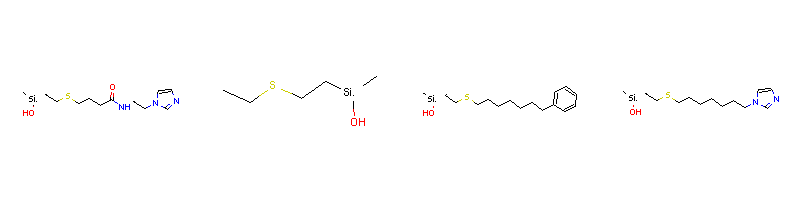

In [189]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[34:38])

In [190]:
comon2_correct[34:38]

,Comonomer2 apol,Comonomer2 bpol,Comonomer2 nHBAcc,Comonomer2 nHBDon,Comonomer2 nRot,Comonomer2 RotRatio,Comonomer2 Vabc,Comonomer2 MW,Comonomer2 AMW,Comonomer2 nAcid,...,Comonomer2 ETA_dEpsilon_C,Comonomer2 ETA_dEpsilon_D,Comonomer2 ETA_dBeta,Comonomer2 AETA_dBeta,Comonomer2 ETA_psi_1,Comonomer2 ETA_dPsi_A,Comonomer2 ETA_dPsi_B,Comonomer2 Kier1,Comonomer2 Kier2,Comonomer2 Kier3
34,48.043446,40.398554,5,2,10,0.526316,288.212822,300.120199,7.320005,0,...,-0.090530,0.049373,-6.75,-0.355263,0.639871,0.074129,0.000000,17.052632,10.7479,9.52066
35,26.250309,27.081691,2,1,4,0.571429,156.526252,149.045638,7.097411,0,...,-0.035256,0.048380,-4.25,-0.531250,0.835694,0.000000,0.121694,8.000000,5.14286,7.2
36,53.955411,41.126589,2,1,11,0.578947,315.616254,295.155188,6.416417,0,...,-0.015409,0.020746,-4.25,-0.223684,0.766871,0.000000,0.052871,17.052632,11.7959,10.449
37,49.811825,41.970175,4,1,11,0.611111,288.358278,285.145686,6.631295,0,...,-0.046739,0.024220,-7.00,-0.388889,0.710110,0.003890,0.000000,16.055556,10.88,9.6


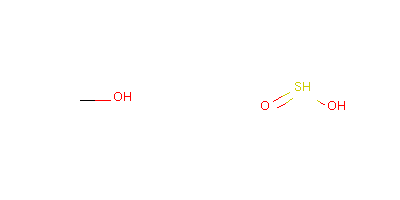

In [191]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[39:41])

In [192]:
comon2_correct[39:41]

,Comonomer2 apol,Comonomer2 bpol,Comonomer2 nHBAcc,Comonomer2 nHBDon,Comonomer2 nRot,Comonomer2 RotRatio,Comonomer2 Vabc,Comonomer2 MW,Comonomer2 AMW,Comonomer2 nAcid,...,Comonomer2 ETA_dEpsilon_C,Comonomer2 ETA_dEpsilon_D,Comonomer2 ETA_dBeta,Comonomer2 AETA_dBeta,Comonomer2 ETA_psi_1,Comonomer2 ETA_dPsi_A,Comonomer2 ETA_dPsi_B,Comonomer2 Kier1,Comonomer2 Kier2,Comonomer2 Kier3
39,5.139172,4.012828,1,1,0,0.0,34.642671,32.026215,5.337702,0,...,-0.161111,0.261111,-0.75,-0.375,0.384615,0.329385,0.0,2.0,float division by zero (Kier2/mordred.Chi.ChiC...,float division by zero (Kier3/mordred.Chi.ChiC...
40,5.837586,6.564414,1,2,0,0.0,44.645937,65.977550,13.195510,1,...,-0.490909,0.400000,0.00,0.000,0.384615,0.329385,0.0,3.0,2,float division by zero (Kier3/mordred.Chi.ChiC...


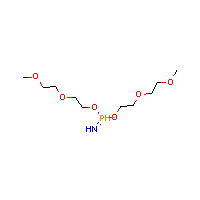

In [193]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[61:62])

In [194]:
comon2_correct[61:62]

,Comonomer2 apol,Comonomer2 bpol,Comonomer2 nHBAcc,Comonomer2 nHBDon,Comonomer2 nRot,Comonomer2 RotRatio,Comonomer2 Vabc,Comonomer2 MW,Comonomer2 AMW,Comonomer2 nAcid,...,Comonomer2 ETA_dEpsilon_C,Comonomer2 ETA_dEpsilon_D,Comonomer2 ETA_dBeta,Comonomer2 AETA_dBeta,Comonomer2 ETA_psi_1,Comonomer2 ETA_dPsi_A,Comonomer2 ETA_dPsi_B,Comonomer2 Kier1,Comonomer2 Kier2,Comonomer2 Kier3
61,42.245032,42.332968,7,1,14,0.823529,265.081687,285.134124,6.788908,0,...,-0.157143,0.066667,-10.25,-0.569444,0.482759,0.231241,0.0,18.0,15.0588,15


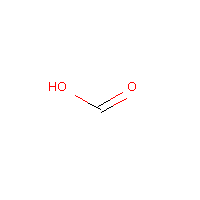

In [195]:
Chem.Draw.MolsToImage(SMILES_type_Chem2[63:64])

In [196]:
comon2_correct[63:64]

,Comonomer2 apol,Comonomer2 bpol,Comonomer2 nHBAcc,Comonomer2 nHBDon,Comonomer2 nRot,Comonomer2 RotRatio,Comonomer2 Vabc,Comonomer2 MW,Comonomer2 AMW,Comonomer2 nAcid,...,Comonomer2 ETA_dEpsilon_C,Comonomer2 ETA_dEpsilon_D,Comonomer2 ETA_dBeta,Comonomer2 AETA_dBeta,Comonomer2 ETA_psi_1,Comonomer2 ETA_dPsi_A,Comonomer2 ETA_dPsi_B,Comonomer2 Kier1,Comonomer2 Kier2,Comonomer2 Kier3
63,4.607586,2.874414,1,1,0,0.0,40.796439,46.005479,9.201096,1,...,-0.437576,0.227778,0.0,0.0,0.321101,0.392899,0.0,3.0,2,float division by zero (Kier3/mordred.Chi.ChiC...


In [197]:
comon2_correct.loc[34, 'Comonomer2 nHBDon'] = 1
comon2_correct.loc[35, 'Comonomer2 nHBDon'] = 0
comon2_correct.loc[36, 'Comonomer2 nHBDon'] = 0
comon2_correct.loc[37, 'Comonomer2 nHBDon'] = 0

comon2_correct.loc[39, 'Comonomer2 nHBDon'] = 0

comon2_correct.loc[40, 'Comonomer2 nHBDon'] = 0
comon2_correct.loc[40, 'Comonomer2 nAcid'] = 0

comon2_correct.loc[61, 'Comonomer2 nHBDon'] = 0

comon2_correct.loc[63, 'Comonomer2 nHBDon'] = 0
comon2_correct.loc[63, 'Comonomer2 nAcid'] = 0

Add those descriptors to the relevant rows of the original dataframe

In [198]:
# first step, copy rows in result dataframe to create dataframe that's same size as data dataframe
Mordred_Columns1 = pd.DataFrame()
Mordred_Columns2 = pd.DataFrame()
listMordred1 = []
listMordred2 = []

for ind in data.index:
    for i in range(len(SMILES_type_fix1)):
        if data['SMILES descriptor 1'][ind] == SMILES_type_fix1[i]:
            listMordred1.append(comon1_correct.iloc[i])

for ind in data.index:
    for i in range(len(SMILES_type_fix2)):
        if data['SMILES descriptor 2'][ind] == SMILES_type_fix2[i]:
            listMordred2.append(comon2_correct.iloc[i])

Mordred_Columns1 = Mordred_Columns1.append(listMordred1, ignore_index = True)
Mordred_Columns2 = Mordred_Columns2.append(listMordred2, ignore_index = True)

Mordred_Columns1.shape
# then, concatenate the Mordred columns dataframe to the data dataframe
data_Mordred = pd.concat([data,Mordred_Columns1,Mordred_Columns2], axis = 1)

#### Seem to be having issues with Kier3, so will drop those columns for both comonomers

In [199]:
data_Mordred.drop(columns = ['Comonomer1 Kier3','Comonomer2 Kier3'], inplace = True)

### Calculate MORDRED descriptors for anion as well

In [200]:
pd.unique(data_Mordred['Anion'])

array(['TFSI', 'N(SO2C2F5)2', 'BF4', 'ClO4', 'CF3SO3', 'PF6', 'SCN',
       'AsF6', 'I', 'AlCl4', 'FSI', 'MPSA'], dtype=object)

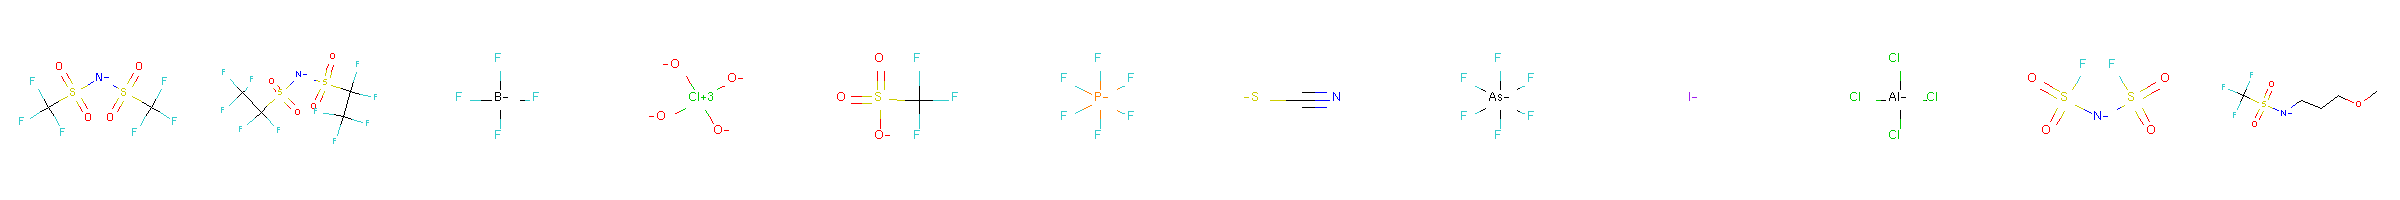

In [201]:
# dictionary with anion and SMILES representation
anion_smiles = {'TFSI':'C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F','CF3SO3':'C(F)(F)(F)S(=O)(=O)[O-]',
                'N(SO2C2F5)2':'C(F)(F)(F)C(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)C(F)(F)F','BF4':'[B-](F)(F)(F)F',
                'ClO4':'[O-]Cl(=O)(=O)=O','PF6':'F[P-](F)(F)(F)(F)F','AsF6':'F[As-](F)(F)(F)(F)F','I':'[I-]',
                'AlCl4':'[Al-](Cl)(Cl)(Cl)Cl','FSI':'FS(=O)(=O)[N-]S(=O)(=O)F',
                'MPSA':'C(F)(F)(F)S(=O)(=O)[N-]CCCOC','SCN':'N#C[S-]'}

AnionSmiles = []

for anion in data_Mordred['Anion']:
    AnionSmiles.append(anion_smiles[anion])
    
data_Mordred['Anion Smiles'] = AnionSmiles

Anion_SMILES_type = pd.unique(data_Mordred['Anion Smiles'])

# remove nan instances
Anion_SMILES_type_fix = Anion_SMILES_type[~pd.isnull(Anion_SMILES_type)]

# have to add Chem.MolFromSmiles for each string in list
Anion_SMILES_type_Chem = [Chem.MolFromSmiles(smile) for smile in Anion_SMILES_type_fix]

# plot the chemical structures to make sure I got them right
Chem.Draw.MolsToImage(Anion_SMILES_type_Chem)

In [202]:
# calculate MORDRED descriptors for anions

result_anion = calc.pandas(Anion_SMILES_type_Chem)

100%|██████████| 12/12 [00:02<00:00,  5.41it/s]


Rename headers for anion descriptors

In [203]:
# rename headers for anion MORDRED descriptors
newcolumns = {}

for column in result_anion:
    newcolumns[column] = 'anion ' + column

result_anion_corr = result_anion.rename(columns = newcolumns)
result_anion_corr

,anion apol,anion bpol,anion nHBAcc,anion nHBDon,anion nRot,anion RotRatio,anion Vabc,anion MW,anion AMW,anion nAcid,...,anion ETA_dEpsilon_C,anion ETA_dEpsilon_D,anion ETA_dBeta,anion AETA_dBeta,anion ETA_psi_1,anion ETA_dPsi_A,anion ETA_dPsi_B,anion Kier1,anion Kier2,anion Kier3
0,16.790000,21.130000,4,0,2,0.142857,161.411,279.917842,18.661189,1,...,-0.984721,0.0,-3.50,-0.233333,0.288604,0.425396,0.000000,15,3.7856,3.5
1,22.358000,25.582000,4,0,4,0.2,220.273,379.911455,18.091022,1,...,-0.991858,0.0,-7.50,-0.357143,0.276687,0.437313,0.000000,21,5.27392,3.67347
2,5.258000,9.892000,0,0,0,0,70.0219,87.003467,17.400693,1,...,-1.08045,0.0,-3.00,-0.600000,0.241577,0.472423,0.000000,5,1,float division by zero (Kier3/mordred.Chi.ChiC...
3,5.388000,5.512000,4,0,0,0,57.6102,98.949060,19.789812,4,...,-1.03283,0.0,-2.00,-0.400000,0.282337,0.431663,0.000000,5,1,float division by zero (Kier3/mordred.Chi.ChiC...
4,8.647000,10.863000,3,0,0,0,87.6166,148.952573,18.619072,1,...,-1.01561,0.0,-2.00,-0.250000,0.277203,0.436797,0.000000,8,1.75,2.22222
5,6.972000,18.438000,0,0,0,0,68.7438,144.964730,20.709247,1,...,bond degree greater then 4 (ETA_epsilon_3/Refe...,0.0,-4.50,-0.642857,0.238394,0.475606,0.000000,7,0.666667,float division by zero (Kier3/mordred.Chi.ChiC...
6,5.670000,1.800000,2,0,0,0,48.7671,57.975694,19.325231,1,...,-0.513131,0.0,1.75,0.583333,0.626506,0.087494,0.000000,3,2,float division by zero (Kier3/mordred.Chi.ChiC...
7,7.652000,22.518000,0,0,0,0,70.8366,188.912564,26.987509,1,...,bond degree greater then 4 (ETA_epsilon_3/Refe...,0.0,-4.50,-0.642857,0.340426,0.373574,0.000000,7,0.666667,float division by zero (Kier3/mordred.Chi.ChiC...
8,5.350000,0.000000,0,0,0,float division by zero (RotRatio/nBondsO),unknown atom type (Vabc/nARing/mordred.RingCou...,126.905022,126.905022,1,...,-0.0771429,0.0,0.00,0.000000,3.593750,0.000000,2.879750,float division by zero (Kier1/mordred.Chi.ChiC...,float division by zero (Kier2/mordred.Chi.ChiC...,float division by zero (Kier3/mordred.Chi.ChiC...
9,15.520000,18.480000,0,0,0,0,unknown atom type (Vabc/nARing/mordred.RingCou...,166.857498,33.371500,1,...,-0.537591,0.0,-3.00,-0.600000,0.947159,0.000000,0.233159,5,1,float division by zero (Kier3/mordred.Chi.ChiC...


Need to edit PF6 values because of high bonding environment

In [204]:
pf6_failures = ['anion ETA_eta_R','anion AETA_eta_R', 'anion ETA_eta_RL', 'anion AETA_eta_RL', 'anion ETA_eta_F', 
                'anion AETA_eta_F','anion ETA_eta_FL', 'anion AETA_eta_FL', 'anion ETA_eta_B', 'anion AETA_eta_B',
                'anion ETA_eta_BR', 'anion AETA_eta_BR', 'anion ETA_dAlpha_A', 'anion ETA_dAlpha_B', 
                'anion ETA_epsilon_3','anion ETA_dEpsilon_A', 'anion ETA_dEpsilon_C']

In [205]:
for failure in pf6_failures:
    result_anion_corr.loc[5,failure] = np.mean([result_anion_corr.loc[0,failure],result_anion_corr.loc[1,failure],
                                                result_anion_corr.loc[2,failure],result_anion_corr.loc[3,failure],
                                               result_anion_corr.loc[4,failure],result_anion_corr.loc[6,failure],
                                               result_anion_corr.loc[10,failure],result_anion_corr.loc[11,failure],])

Drop anion Kier3

In [206]:
result_anion_corr.drop(columns = ['anion Kier3'],inplace = True)

Append descriptors to each relevant row of dataframe

In [207]:
Mordred_Columns_anion = pd.DataFrame()
listMordredanion = []

for ind in data_Mordred.index:
    for i in range(len(Anion_SMILES_type_fix)):
        if data_Mordred['Anion Smiles'][ind] == Anion_SMILES_type_fix[i]:
            listMordredanion.append(result_anion_corr.iloc[i])
            break
        
Mordred_Columns_anion = Mordred_Columns_anion.append(listMordredanion, ignore_index = True)

# concatenate the Mordred columns dataframe to the data dataframe
data_Mordred_anion = pd.concat([data_Mordred,Mordred_Columns_anion], axis = 1)

#show dataframe size
data_Mordred_anion.shape

(655, 301)

### Replace solvent with boiling point

In [208]:
pd.unique(data_Mordred_anion['Solvent used'])

array(['acetonitrile', 'dimethylcarbonate', 'none', 'acetone', 'THF',
       'NMP', 'DMF', 'dimethyl ketone', 'DMSO', 'water', 'methanol',
       'benzene', 'dimethoxyethane', 'chloroform'], dtype=object)

In [209]:
solvent_BP = {'acetonitrile':82,'dimethylcarbonate':90,'chloroform':61.2,
                 'acetone':56,'THF':66,'NMP':202,'none':-273.15,
                 'DMF':153, 'dimethoxyethane':185,'dimethyl ketone': 56, 'DMSO': 189, 'water': 100, 
             'methanol': 65, 'benzene': 80,}

In [210]:
BP_solvent = pd.DataFrame()
BP_solvent['solvent BP'] = [solvent_BP[solvent] for solvent in data_Mordred_anion['Solvent used']]

# concatenate the Mordred columns dataframe to the data dataframe
data_Mordred_anion = pd.concat([data_Mordred_anion,BP_solvent], axis = 1)

data_Mordred_anion

,Polymer system Notes,Polymer family,Polymer,SMILES descriptor 1,SMILES descriptor 2,Comonomer percentage,Average functional group per monomer,Anion,Li:monomer,Li:functional group,...,anion ETA_dEpsilon_C,anion ETA_dEpsilon_D,anion ETA_dBeta,anion AETA_dBeta,anion ETA_psi_1,anion ETA_dPsi_A,anion ETA_dPsi_B,anion Kier1,anion Kier2,solvent BP
0,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,TFSI,0.074817,0.074817,...,-0.984721,0.0,-3.5,-0.233333,0.288604,0.425396,0.0,15,3.7856,82.0
1,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,TFSI,0.199513,0.199513,...,-0.984721,0.0,-3.5,-0.233333,0.288604,0.425396,0.0,15,3.7856,82.0
2,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,TFSI,0.448905,0.448905,...,-0.984721,0.0,-3.5,-0.233333,0.288604,0.425396,0.0,15,3.7856,82.0
3,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,TFSI,1.197079,1.197079,...,-0.984721,0.0,-3.5,-0.233333,0.288604,0.425396,0.0,15,3.7856,82.0
4,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,N(SO2C2F5)2,0.055470,0.055470,...,-0.991858,0.0,-7.5,-0.357143,0.276687,0.437313,0.0,21,5.27392,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,6,ether,poly (ethylene oxide-co-digol methyl glycidyl ...,COC,C(COCCOCCOC)OC,71.4,NaN,CF3SO3,NaN,0.062461,...,-1.01561,0.0,-2.0,-0.250000,0.277203,0.436797,0.0,8,1.75,82.0
651,6,ether,poly (ethylene oxide-co-digol methyl glycidyl ...,COC,C(COCCOCCOC)OC,71.4,NaN,CF3SO3,NaN,0.033156,...,-1.01561,0.0,-2.0,-0.250000,0.277203,0.436797,0.0,8,1.75,82.0
652,6,ether,poly (ethylene oxide-co-digol methyl glycidyl ...,COC,C(COCCOCCOC)OC,71.4,NaN,CF3SO3,NaN,0.019904,...,-1.01561,0.0,-2.0,-0.250000,0.277203,0.436797,0.0,8,1.75,82.0
653,6,ether,poly (ethylene oxide-co-digol methyl glycidyl ...,COC,C(COCCOCCOC)OC,71.4,NaN,CF3SO3,NaN,0.014263,...,-1.01561,0.0,-2.0,-0.250000,0.277203,0.436797,0.0,8,1.75,82.0


### Fill in any additionally missing data

This includes salt concentrations (now that have MORDRED-calculated MW)

In [211]:
# filling in salt concentration data, if missing
for i in data_Mordred_anion.index:
    # first fill in li:monomer column for those samples where concentration given as salt wt%
    if pd.isnull(data_Mordred_anion['Li:functional group'][i]) and pd.isnull(data_Mordred_anion['salt wt%'][i]) == False:
        salt_mol = data_Mordred_anion['salt wt%'][i] / 100 / (data_Mordred_anion['anion MW'][i] + 6.941) #add in Li molar mass
        polymer_mw = data_Mordred['Comonomer1 MW'][i]*data_Mordred['Comonomer percentage'][i]/100 + data_Mordred['Comonomer2 MW'][i]*(100-data_Mordred['Comonomer percentage'][i])/100
        polymer_mol=(1 - data_Mordred_anion['salt wt%'][i] / 100) / polymer_mw
        data_Mordred_anion.loc[i,'Li:monomer'] = salt_mol / polymer_mol
    # then fill in Li:funcitonal group column for all samples that have Li:monomer column filled out
    if pd.isnull(data_Mordred_anion['Li:functional group'][i]) and pd.isnull(data_Mordred_anion['Li:monomer'][i]) == False:
        data_Mordred_anion.loc[i,'Li:functional group'] = data_Mordred_anion['Li:monomer'][i] / data_Mordred_anion['Average functional group per monomer'][i]
        

Add any possible missing Tg data

In [212]:
# If Tg of polymer with salt is missing, BUT have Tg of polymer without salt, could use that as a proxy
# --> create new column 'approx Tg' for this
approxTg = []
for i in data_Mordred_anion.index:
    if pd.isnull(data_Mordred_anion['Tg'][i]) == False:
        approxTg.append(data_Mordred_anion['Tg'][i])
    elif pd.isnull(data_Mordred_anion['Tg'][i]) and pd.isnull(data_Mordred_anion['Tg polymer without salt'][i]) == False:
        approxTg.append(data_Mordred_anion['Tg polymer without salt'][i])        
    else:
        approxTg.append(np.nan)
data_Mordred_anion['approxTg'] = approxTg

data_Mordred_anion.head()

,Polymer system Notes,Polymer family,Polymer,SMILES descriptor 1,SMILES descriptor 2,Comonomer percentage,Average functional group per monomer,Anion,Li:monomer,Li:functional group,...,anion ETA_dEpsilon_D,anion ETA_dBeta,anion AETA_dBeta,anion ETA_psi_1,anion ETA_dPsi_A,anion ETA_dPsi_B,anion Kier1,anion Kier2,solvent BP,approxTg
0,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,TFSI,0.074817,0.074817,...,0.0,-3.5,-0.233333,0.288604,0.425396,0.0,15,3.7856,82.0,-3.0
1,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,TFSI,0.199513,0.199513,...,0.0,-3.5,-0.233333,0.288604,0.425396,0.0,15,3.7856,82.0,-20.0
2,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,TFSI,0.448905,0.448905,...,0.0,-3.5,-0.233333,0.288604,0.425396,0.0,15,3.7856,82.0,-33.0
3,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,TFSI,1.197079,1.197079,...,0.0,-3.5,-0.233333,0.288604,0.425396,0.0,15,3.7856,82.0,-62.0
4,NaN,"carbonate, ether",polyethylene carbonate,COC(=O)OC,COC,95.2,NaN,N(SO2C2F5)2,0.055470,0.055470,...,0.0,-7.5,-0.357143,0.276687,0.437313,0.0,21,5.27392,82.0,-14.0


#### Replace molecular weight with either Mn (if available) or Mw

In [213]:
approxMW = []
for i in data_Mordred_anion.index:
    if pd.isnull(data_Mordred_anion['Polymer Mn (kDa)'][i]) == False:
        approxMW.append(data_Mordred_anion['Polymer Mn (kDa)'][i])
    elif pd.isnull(data_Mordred_anion['Polymer Mw (kDa)'][i]) == False:
        approxMW.append(data_Mordred_anion['Polymer Mw (kDa)'][i])
    else:
        approxMW.append(np.nan)
data_Mordred_anion['approxMW(kDa)'] = approxMW

In [214]:
data_Mordred_anion['approxMW(kDa)']

0        37.0
1        37.0
2        37.0
3        37.0
4        37.0
        ...  
650    1000.0
651    1000.0
652    1000.0
653    1000.0
654    1000.0
Name: approxMW(kDa), Length: 655, dtype: float64

### Export data as csv for visualizations
Add in index column which might be useful for visualizations

In [215]:
data_Mordred_anion['Index'] = data_Mordred_anion.index

Add https to doi for link

In [216]:
DOILink = ["https://doi.org/" + str(i) for i in data_Mordred_anion['DOI']]

data_Mordred_anion['DOI'] = DOILink

Save data to file

In [217]:
file_name = 'Cleaned_Final_Data_6_2_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\_' 
file = file_path + file_name
data_Mordred_anion.to_csv(file, sep=',',index = False)

### Clean data further for statistical learning

Want to remove all columns that aren't populated enough, as well as those rows that contain NaNs

In [218]:
dataML = data_Mordred_anion.copy()

Make relevant columns into log format

In [219]:
dataML['logCond60'] = np.log10(dataML['Conductivity at 60C'])
dataML['logCond30'] = np.log10(dataML['Conductivity at 30C'])
dataML['logCond90'] = np.log10(dataML['Conductivity at 90C'])
dataML['log Li:functional group'] = np.log10(dataML['Li:functional group'])

#### Drop columns that I don't want

Note: don't yet drop polymer family, polymer or anion columns because I'll use them for the visualization process

In [220]:
dataML.isna().sum()[0:50]

Polymer system Notes                    418
Polymer family                            0
Polymer                                   0
SMILES descriptor 1                       0
SMILES descriptor 2                       0
Comonomer percentage                      0
Average functional group per monomer    130
Anion                                     0
Li:monomer                              434
Li:functional group                       0
salt wt%                                542
Tg                                      287
Tg polymer without salt                 286
Tm                                      573
Tm start                                621
Tm end                                  615
% crystallinity                         518
crystalline?                              0
Conductivity at 0C                      605
Conductivity at 15C                     584
Conductivity at 20C                     520
Conductivity at 21C                     648
Conductivity at 25C             

In [221]:
dataML.isna().sum()[50:100]

VFT Notes (above temp)                          337
VFT prefactor with set T0                       396
VFT activation energy with fixed T0 (K)         396
Fixed T0 (degC)                                 396
Arrhenius Ea (eV) low T                         629
Arrhenius Ea (eV) high T                        560
Arrhenius Ea (eV) low T me                      593
Arrhenius prefactor low T me (S/cm)               0
Arrhenius Ea (eV) high T me                     231
Arrhenius prefactor high T me (S/cm)              0
Arrhenius notes                                 414
Li diffusion coefficient cm^2/s                 626
temperature for D_Li                            626
X-ray structural data (aggregate? Distance?)    655
PDI                                             390
Polymer Mn (kDa)                                330
Polymer Mw (kDa)                                127
chain architecture                                0
Solvent used                                      0
drying temp 

In [222]:
dataML.isna().sum()[100:150]

Comonomer1 nBr               0
Comonomer1 nI                0
Comonomer1 nX                0
Comonomer1 ETA_alpha         0
Comonomer1 AETA_alpha        0
Comonomer1 ETA_shape_p       0
Comonomer1 ETA_shape_y       0
Comonomer1 ETA_shape_x       0
Comonomer1 ETA_beta          0
Comonomer1 AETA_beta         0
Comonomer1 ETA_beta_s        0
Comonomer1 AETA_beta_s       0
Comonomer1 ETA_beta_ns       0
Comonomer1 AETA_beta_ns      0
Comonomer1 ETA_beta_ns_d     0
Comonomer1 AETA_beta_ns_d    0
Comonomer1 ETA_eta           0
Comonomer1 AETA_eta          0
Comonomer1 ETA_eta_L         0
Comonomer1 AETA_eta_L        0
Comonomer1 ETA_eta_R         0
Comonomer1 AETA_eta_R        0
Comonomer1 ETA_eta_RL        0
Comonomer1 AETA_eta_RL       0
Comonomer1 ETA_eta_F         0
Comonomer1 AETA_eta_F        0
Comonomer1 ETA_eta_FL        0
Comonomer1 AETA_eta_FL       0
Comonomer1 ETA_eta_B         0
Comonomer1 AETA_eta_B        0
Comonomer1 ETA_eta_BR        0
Comonomer1 AETA_eta_BR       0
Comonome

In [223]:
dataML.isna().sum()[150:200]

Comonomer2 apol              0
Comonomer2 bpol              0
Comonomer2 nHBAcc            0
Comonomer2 nHBDon            0
Comonomer2 nRot              0
Comonomer2 RotRatio          0
Comonomer2 Vabc              0
Comonomer2 MW                0
Comonomer2 AMW               0
Comonomer2 nAcid             0
Comonomer2 nBase             0
Comonomer2 nAtom             0
Comonomer2 nHeavyAtom        0
Comonomer2 nSpiro            0
Comonomer2 nBridgehead       0
Comonomer2 nHetero           0
Comonomer2 nH                0
Comonomer2 nB                0
Comonomer2 nC                0
Comonomer2 nN                0
Comonomer2 nO                0
Comonomer2 nS                0
Comonomer2 nP                0
Comonomer2 nF                0
Comonomer2 nCl               0
Comonomer2 nBr               0
Comonomer2 nI                0
Comonomer2 nX                0
Comonomer2 ETA_alpha         0
Comonomer2 AETA_alpha        0
Comonomer2 ETA_shape_p       0
Comonomer2 ETA_shape_y       0
Comonome

In [224]:
dataML.isna().sum()[200:250]

Comonomer2 AETA_eta_F        0
Comonomer2 ETA_eta_FL        0
Comonomer2 AETA_eta_FL       0
Comonomer2 ETA_eta_B         0
Comonomer2 AETA_eta_B        0
Comonomer2 ETA_eta_BR        0
Comonomer2 AETA_eta_BR       0
Comonomer2 ETA_dAlpha_A      0
Comonomer2 ETA_dAlpha_B      0
Comonomer2 ETA_epsilon_1     0
Comonomer2 ETA_epsilon_2     0
Comonomer2 ETA_epsilon_3     0
Comonomer2 ETA_epsilon_4     0
Comonomer2 ETA_epsilon_5     0
Comonomer2 ETA_dEpsilon_A    0
Comonomer2 ETA_dEpsilon_B    0
Comonomer2 ETA_dEpsilon_C    0
Comonomer2 ETA_dEpsilon_D    0
Comonomer2 ETA_dBeta         0
Comonomer2 AETA_dBeta        0
Comonomer2 ETA_psi_1         0
Comonomer2 ETA_dPsi_A        0
Comonomer2 ETA_dPsi_B        0
Comonomer2 Kier1             0
Comonomer2 Kier2             0
Anion Smiles                 0
anion apol                   0
anion bpol                   0
anion nHBAcc                 0
anion nHBDon                 0
anion nRot                   0
anion RotRatio               0
anion Va

In [225]:
dataML.isna().sum()[250:300]

anion nCl               0
anion nBr               0
anion nI                0
anion nX                0
anion ETA_alpha         0
anion AETA_alpha        0
anion ETA_shape_p       0
anion ETA_shape_y       0
anion ETA_shape_x       0
anion ETA_beta          0
anion AETA_beta         0
anion ETA_beta_s        0
anion AETA_beta_s       0
anion ETA_beta_ns       0
anion AETA_beta_ns      0
anion ETA_beta_ns_d     0
anion AETA_beta_ns_d    0
anion ETA_eta           0
anion AETA_eta          0
anion ETA_eta_L         0
anion AETA_eta_L        0
anion ETA_eta_R         0
anion AETA_eta_R        0
anion ETA_eta_RL        0
anion AETA_eta_RL       0
anion ETA_eta_F         0
anion AETA_eta_F        0
anion ETA_eta_FL        0
anion AETA_eta_FL       0
anion ETA_eta_B         0
anion AETA_eta_B        0
anion ETA_eta_BR        0
anion AETA_eta_BR       0
anion ETA_dAlpha_A      0
anion ETA_dAlpha_B      0
anion ETA_epsilon_1     0
anion ETA_epsilon_2     0
anion ETA_epsilon_3     0
anion ETA_ep

In [226]:
dataML.isna().sum()[300:]

anion Kier2                  0
solvent BP                   0
approxTg                   214
approxMW(kDa)               67
Index                        0
logCond60                  266
logCond30                  337
logCond90                  334
log Li:functional group      0
dtype: int64

In [227]:
# list columns to drop
dropCol = ['Conductivity at 0C', 'Conductivity at 15C', 'Conductivity at 20C',
       'Conductivity at 21C', 'Conductivity at 25C', 'Conductivity at 27C',
       'Conductivity at 30C', 'Conductivity at 35C', 'Conductivity at 40C',
       'Conductivity at 45C', 'Conductivity at 50C', 'Conductivity at 55C',
       'Conductivity at 60C', 'Conductivity at 65C', 'Conductivity at 70C',
       'Conductivity at 75C', 'Conductivity at 80C', 'Conductivity at 85C',
       'Conductivity at 90C', 'Conductivity at 100C', 'Conductivity at 110C',
       'Conductivity at 125C','salt wt%', 'Polymer system Notes', 
       'SMILES descriptor 1', 'SMILES descriptor 2', 'Li:monomer',
           'Tm', 'Tm start', 'Tm end', '% crystallinity','Transference number', 'T for transference',
       'Transference notes',
       'storage modulus', 'T for storage mod',
       'viscosity (mPa s)', 'Arrhenius Ea (eV) low T',
       'Arrhenius Ea (eV) high T', 'Arrhenius Ea (eV) low T me',
       'Arrhenius prefactor low T me (S/cm)','Arrhenius notes',
       'Li diffusion coefficient cm^2/s', 'temperature for D_Li',
       'X-ray structural data (aggregate? Distance?)',
           'Notes', 'DOI', 'Reference', 'Index','Li:functional group', 
          'logCond30', 'logCond90','youngs modulus (Mpa)','VFT Notes (above temp)',
           'Comonomer1 AMW','Comonomer2 AMW','anion AMW',
          'Average functional group per monomer',
          'PDI', 'Polymer Mn (kDa)',
       'Polymer Mw (kDa)','Tg', 'Tg polymer without salt',
          'VFT prefactor with set T0','VFT activation energy with fixed T0 (K)', 'Fixed T0 (degC)',
          'Anion Smiles','Solvent used','VFT prefactor (S/cm*T^(1/2))',
       'VFT activation energy (K)', 'VFT T0 (degC)',
       'Arrhenius Ea (eV) high T me', 'Arrhenius prefactor high T me (S/cm)',]

data_sparse = dataML.drop(columns = dropCol)

In [228]:
data_sparse.columns

Index(['Polymer family', 'Polymer', 'Comonomer percentage', 'Anion',
       'crystalline?', 'chain architecture', 'drying temp', 'drying time (h)',
       'drying vacuum', 'Comonomer1 apol',
       ...
       'anion ETA_psi_1', 'anion ETA_dPsi_A', 'anion ETA_dPsi_B',
       'anion Kier1', 'anion Kier2', 'solvent BP', 'approxTg', 'approxMW(kDa)',
       'logCond60', 'log Li:functional group'],
      dtype='object', length=236)

In [229]:
data_sparse.isna().sum()[0:50]

Polymer family                0
Polymer                       0
Comonomer percentage          0
Anion                         0
crystalline?                  0
chain architecture            0
drying temp                  67
drying time (h)              87
drying vacuum                 0
Comonomer1 apol               0
Comonomer1 bpol               0
Comonomer1 nHBAcc             0
Comonomer1 nHBDon             0
Comonomer1 nRot               0
Comonomer1 RotRatio           0
Comonomer1 Vabc               0
Comonomer1 MW                 0
Comonomer1 nAcid              0
Comonomer1 nBase              0
Comonomer1 nAtom              0
Comonomer1 nHeavyAtom         0
Comonomer1 nSpiro             0
Comonomer1 nBridgehead        0
Comonomer1 nHetero            0
Comonomer1 nH                 0
Comonomer1 nB                 0
Comonomer1 nC                 0
Comonomer1 nN                 0
Comonomer1 nO                 0
Comonomer1 nS                 0
Comonomer1 nP                 0
Comonome

In [230]:
data_sparse.isna().sum()[50:100]

Comonomer1 AETA_eta          0
Comonomer1 ETA_eta_L         0
Comonomer1 AETA_eta_L        0
Comonomer1 ETA_eta_R         0
Comonomer1 AETA_eta_R        0
Comonomer1 ETA_eta_RL        0
Comonomer1 AETA_eta_RL       0
Comonomer1 ETA_eta_F         0
Comonomer1 AETA_eta_F        0
Comonomer1 ETA_eta_FL        0
Comonomer1 AETA_eta_FL       0
Comonomer1 ETA_eta_B         0
Comonomer1 AETA_eta_B        0
Comonomer1 ETA_eta_BR        0
Comonomer1 AETA_eta_BR       0
Comonomer1 ETA_dAlpha_A      0
Comonomer1 ETA_dAlpha_B      0
Comonomer1 ETA_epsilon_1     0
Comonomer1 ETA_epsilon_2     0
Comonomer1 ETA_epsilon_3     0
Comonomer1 ETA_epsilon_4     0
Comonomer1 ETA_epsilon_5     0
Comonomer1 ETA_dEpsilon_A    0
Comonomer1 ETA_dEpsilon_B    0
Comonomer1 ETA_dEpsilon_C    0
Comonomer1 ETA_dEpsilon_D    0
Comonomer1 ETA_dBeta         0
Comonomer1 AETA_dBeta        0
Comonomer1 ETA_psi_1         0
Comonomer1 ETA_dPsi_A        0
Comonomer1 ETA_dPsi_B        0
Comonomer1 Kier1             0
Comonome

In [231]:
data_sparse.isna().sum()[100:150]

Comonomer2 nC                0
Comonomer2 nN                0
Comonomer2 nO                0
Comonomer2 nS                0
Comonomer2 nP                0
Comonomer2 nF                0
Comonomer2 nCl               0
Comonomer2 nBr               0
Comonomer2 nI                0
Comonomer2 nX                0
Comonomer2 ETA_alpha         0
Comonomer2 AETA_alpha        0
Comonomer2 ETA_shape_p       0
Comonomer2 ETA_shape_y       0
Comonomer2 ETA_shape_x       0
Comonomer2 ETA_beta          0
Comonomer2 AETA_beta         0
Comonomer2 ETA_beta_s        0
Comonomer2 AETA_beta_s       0
Comonomer2 ETA_beta_ns       0
Comonomer2 AETA_beta_ns      0
Comonomer2 ETA_beta_ns_d     0
Comonomer2 AETA_beta_ns_d    0
Comonomer2 ETA_eta           0
Comonomer2 AETA_eta          0
Comonomer2 ETA_eta_L         0
Comonomer2 AETA_eta_L        0
Comonomer2 ETA_eta_R         0
Comonomer2 AETA_eta_R        0
Comonomer2 ETA_eta_RL        0
Comonomer2 AETA_eta_RL       0
Comonomer2 ETA_eta_F         0
Comonome

In [232]:
data_sparse.isna().sum()[150:200]

Comonomer2 ETA_dBeta     0
Comonomer2 AETA_dBeta    0
Comonomer2 ETA_psi_1     0
Comonomer2 ETA_dPsi_A    0
Comonomer2 ETA_dPsi_B    0
Comonomer2 Kier1         0
Comonomer2 Kier2         0
anion apol               0
anion bpol               0
anion nHBAcc             0
anion nHBDon             0
anion nRot               0
anion RotRatio           0
anion Vabc               0
anion MW                 0
anion nAcid              0
anion nBase              0
anion nAtom              0
anion nHeavyAtom         0
anion nSpiro             0
anion nBridgehead        0
anion nHetero            0
anion nH                 0
anion nB                 0
anion nC                 0
anion nN                 0
anion nO                 0
anion nS                 0
anion nP                 0
anion nF                 0
anion nCl                0
anion nBr                0
anion nI                 0
anion nX                 0
anion ETA_alpha          0
anion AETA_alpha         0
anion ETA_shape_p        0
a

In [233]:
data_sparse.isna().sum()[200:]

anion AETA_eta_L             0
anion ETA_eta_R              0
anion AETA_eta_R             0
anion ETA_eta_RL             0
anion AETA_eta_RL            0
anion ETA_eta_F              0
anion AETA_eta_F             0
anion ETA_eta_FL             0
anion AETA_eta_FL            0
anion ETA_eta_B              0
anion AETA_eta_B             0
anion ETA_eta_BR             0
anion AETA_eta_BR            0
anion ETA_dAlpha_A           0
anion ETA_dAlpha_B           0
anion ETA_epsilon_1          0
anion ETA_epsilon_2          0
anion ETA_epsilon_3          0
anion ETA_epsilon_4          0
anion ETA_epsilon_5          0
anion ETA_dEpsilon_A         0
anion ETA_dEpsilon_B         0
anion ETA_dEpsilon_C         0
anion ETA_dEpsilon_D         0
anion ETA_dBeta              0
anion AETA_dBeta             0
anion ETA_psi_1              0
anion ETA_dPsi_A             0
anion ETA_dPsi_B             0
anion Kier1                  0
anion Kier2                  0
solvent BP                   0
approxTg

### Convert strings into integers or one-hot vectors 

Convert crystallinity

In [234]:
pd.unique(data_sparse['crystalline?'])

array(['no', 'na', 'yes'], dtype=object)

In [235]:
# Only have two values, yes or no, which should make this straightforward
data_sparse.loc[(data_sparse['crystalline?'] =='yes'),'crystalline?'] = 1
data_sparse.loc[(data_sparse['crystalline?'] =='no'),'crystalline?'] = 0
data_sparse.loc[(data_sparse['crystalline?'] =='na'),'crystalline?'] = -1

data_sparse.head()

,Polymer family,Polymer,Comonomer percentage,Anion,crystalline?,chain architecture,drying temp,drying time (h),drying vacuum,Comonomer1 apol,...,anion ETA_psi_1,anion ETA_dPsi_A,anion ETA_dPsi_B,anion Kier1,anion Kier2,solvent BP,approxTg,approxMW(kDa),logCond60,log Li:functional group
0,"carbonate, ether",polyethylene carbonate,95.2,TFSI,0,linear,60,24,yes,11.416758,...,0.288604,0.425396,0.0,15,3.7856,82.0,-3.0,37.0,-5.72,-1.125997
1,"carbonate, ether",polyethylene carbonate,95.2,TFSI,0,linear,60,24,yes,11.416758,...,0.288604,0.425396,0.0,15,3.7856,82.0,-20.0,37.0,-5.19,-0.700029
2,"carbonate, ether",polyethylene carbonate,95.2,TFSI,0,linear,60,24,yes,11.416758,...,0.288604,0.425396,0.0,15,3.7856,82.0,-33.0,37.0,-4.81,-0.347846
3,"carbonate, ether",polyethylene carbonate,95.2,TFSI,0,linear,60,24,yes,11.416758,...,0.288604,0.425396,0.0,15,3.7856,82.0,-62.0,37.0,-4.25,0.078123
4,"carbonate, ether",polyethylene carbonate,95.2,N(SO2C2F5)2,0,linear,60,24,yes,11.416758,...,0.276687,0.437313,0.0,21,5.27392,82.0,-14.0,37.0,-5.56,-1.255939


Convert drying vacuum into vectors as well

In [236]:
pd.unique(data_sparse['drying vacuum'])

array(['yes', 'none', 'high', 'dry nitrogen'], dtype=object)

In [237]:
data_sparse.loc[(data_sparse['drying vacuum'] =='yes'),'drying vacuum'] = 2
data_sparse.loc[(data_sparse['drying vacuum'] =='none'),'drying vacuum'] = 0
data_sparse.loc[pd.isnull(data_sparse['drying vacuum']),'drying vacuum'] = 0
data_sparse.loc[(data_sparse['drying vacuum'] =='high'),'drying vacuum'] = 3
data_sparse.loc[(data_sparse['drying vacuum'] =='dry nitrogen'),'drying vacuum'] = 1

#### For missing drying time/temp, change time to 8 h and temp to 25 C

In [238]:
data_sparse.loc[pd.isnull(data_sparse['drying temp']),'drying temp'] = 25
data_sparse.loc[pd.isnull(data_sparse['drying time (h)']),'drying time (h)'] = 8

In [239]:
data_sparse.isna().sum()[0:10]

Polymer family          0
Polymer                 0
Comonomer percentage    0
Anion                   0
crystalline?            0
chain architecture      0
drying temp             0
drying time (h)         0
drying vacuum           0
Comonomer1 apol         0
dtype: int64

In [240]:
data_sparse.isna().sum()[-10:]

anion ETA_psi_1              0
anion ETA_dPsi_A             0
anion ETA_dPsi_B             0
anion Kier1                  0
anion Kier2                  0
solvent BP                   0
approxTg                   214
approxMW(kDa)               67
logCond60                  266
log Li:functional group      0
dtype: int64

#### Drop any remaining NaN rows before converting other strings to one-hot vectors

In [241]:
data_sparse_noNaN = data_sparse.copy()
data_sparse_noNaN = data_sparse_noNaN.dropna()
data_sparse_noNaN.reset_index(drop=True, inplace = True)

print(f'DataFrame shape before dropping NaNs: {data_sparse.shape}')
print(f'DataFrame shape after dropping NaNs: {data_sparse_noNaN.shape}')

DataFrame shape before dropping NaNs: (655, 236)
DataFrame shape after dropping NaNs: (271, 236)


#### Convert chain architecture and solvent used into one-hot vectors using pandas get_dummies.

Note: get_dummies does one-hot encoding, seemingly similar to sklearn's: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

In [242]:
data_sparse_noNaN = pd.get_dummies(data_sparse_noNaN,columns = ['chain architecture'])
print(f'DataFrame shape after one-hot encoding: {data_sparse_noNaN.shape}')

DataFrame shape after one-hot encoding: (271, 237)


### Save to .csv file for statistical learning

In [243]:
file_name = 'Cleaned_Final_Data-forML_6_2_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\_' 
file = file_path + file_name
data_sparse_noNaN.to_csv(file, sep=',',index = False)